<a href="https://colab.research.google.com/github/SURESHASWATHI/assignment/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform logistic regression on the dataset "titanic.csv". The analysis should include data exploration, preprocessing, model building, evaluation, and interpretation. Finally, deploy the trained model using Streamlit.

## Data loading and exploration

### Subtask:
Load the dataset and perform exploratory data analysis (EDA). Examine the features, their types, and summary statistics. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features and analyze any patterns or correlations observed in the data.


**Reasoning**:
Import necessary libraries and load the training dataset to start the exploratory data analysis.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('/content/Titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Reasoning**:
Display information about the DataFrame, including data types and non-null counts, and generate descriptive statistics for numerical columns to understand the data structure and distributions.



In [2]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Reasoning**:
Check for missing values in each column to identify columns that require imputation or removal.



In [3]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Reasoning**:
Create visualizations for key features to understand their distributions and relationships.



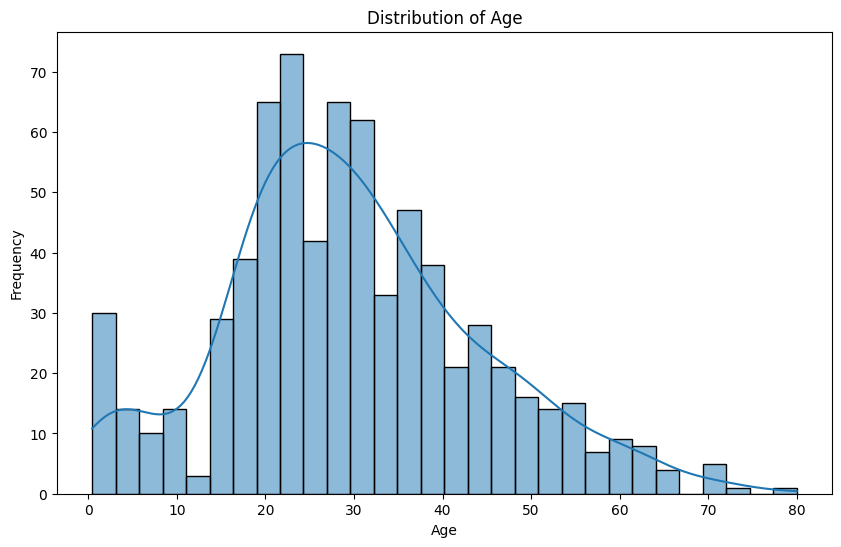

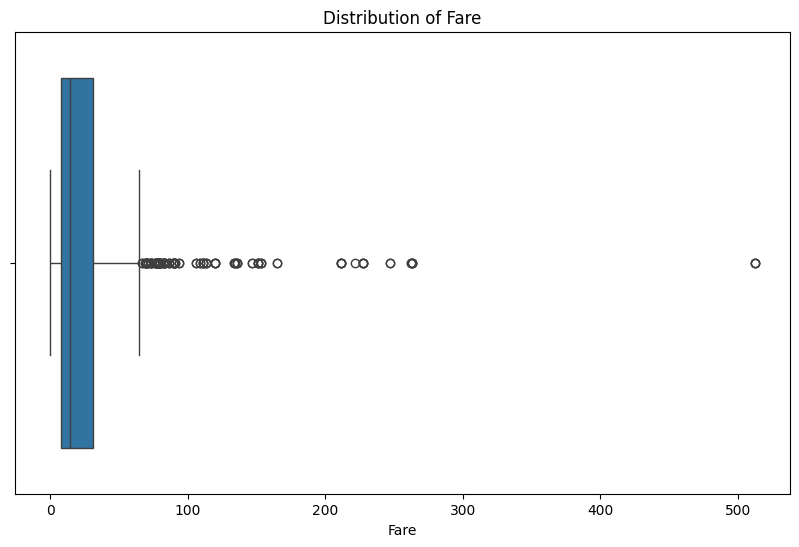

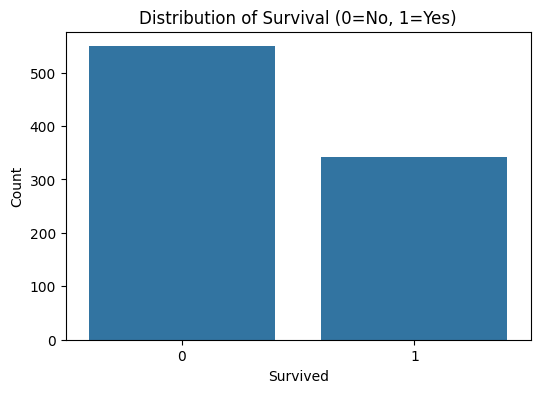

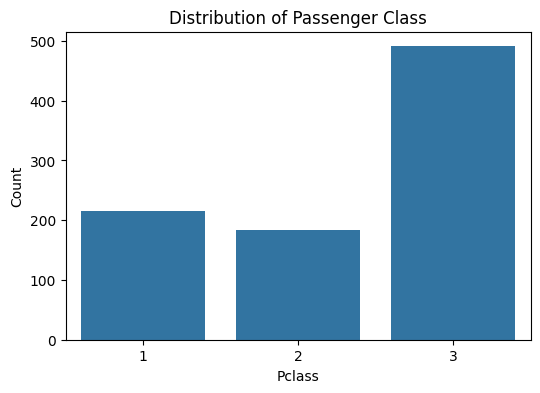

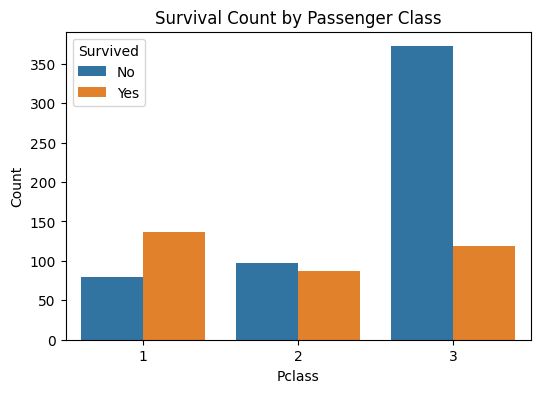

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df_train)
plt.title('Distribution of Survival (0=No, 1=Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df_train)
plt.title('Distribution of Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## Data preprocessing

### Subtask:
Handle missing values (e.g., imputation) and encode categorical variables.


**Reasoning**:
Fill missing values in 'Age' and 'Embarked', drop specified columns, and encode categorical variables ('Sex' and 'Embarked') using one-hot encoding. Finally, display the head of the preprocessed DataFrame and check for missing values.



In [5]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

df_train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)

display(df_train.head())
print(df_train.isnull().sum())

/tmp/ipython-input-1065173818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
/tmp/ipython-input-1065173818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


## Model building

### Subtask:
Build a logistic regression model using scikit-learn and train the model using the training data.


**Reasoning**:
Separate features and target, split data into training and testing sets, instantiate and train a logistic regression model.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)

model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

## Model evaluation

### Subtask:
Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score. Visualize the ROC curve.


**Reasoning**:
Evaluate the performance of the trained model on the testing data using various metrics and visualize the ROC curve as per the instructions.



Accuracy: 0.7821
Precision: 0.7612
Recall: 0.6892
F1-score: 0.7234
ROC-AUC Score: 0.8779


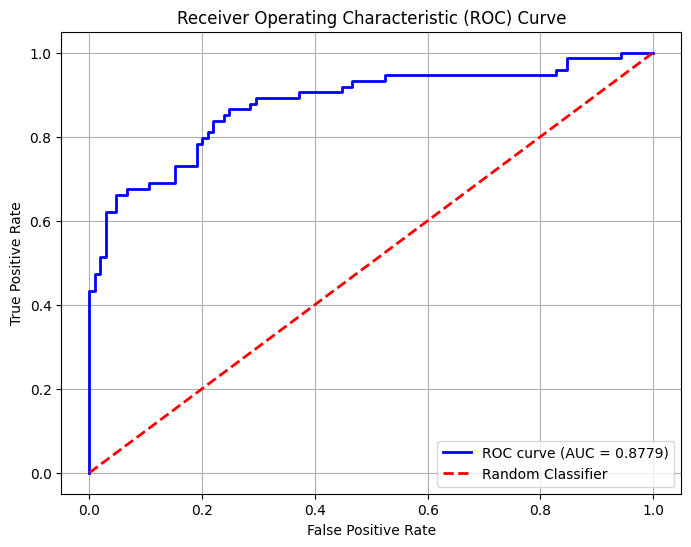

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC-AUC Score: {roc_auc:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Interpretation

### Subtask:
Interpret the coefficients of the logistic regression model and discuss the significance of features in predicting the target variable (survival probability in this case).


**Reasoning**:
Access the coefficients and feature names, create a DataFrame to display them, and then discuss their implications.



In [8]:
coefficients = model.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("Logistic Regression Model Coefficients:")
display(coef_df.sort_values(by='Coefficient', ascending=False))

print("\nInterpretation of Coefficients:")
print("- A positive coefficient indicates that as the feature value increases, the log-odds of survival increase (higher probability of survival).")
print("- A negative coefficient indicates that as the feature value increases, the log-odds of survival decrease (lower probability of survival).")
print("- The magnitude of the coefficient indicates the strength of the relationship.")

print("\nDiscussion of Feature Significance:")
print(f"- **{coef_df.iloc[coef_df['Coefficient'].abs().argmax()]['Feature']}** has the largest absolute coefficient, indicating it has the strongest impact on survival probability.")
print("- Consider the sign and magnitude of other coefficients to understand their influence (e.g., Pclass, Fare, Embarked).")

Logistic Regression Model Coefficients:


,Feature,Coefficient
4,Fare,0.005021
1,Age,-0.020520
6,Embarked_Q,-0.034498
3,Parch,-0.097753
7,Embarked_S,-0.247656
2,SibSp,-0.278049
0,Pclass,-0.700522
5,Sex_male,-2.454297



Interpretation of Coefficients:
- A positive coefficient indicates that as the feature value increases, the log-odds of survival increase (higher probability of survival).
- A negative coefficient indicates that as the feature value increases, the log-odds of survival decrease (lower probability of survival).
- The magnitude of the coefficient indicates the strength of the relationship.

Discussion of Feature Significance:
- **Sex_male** has the largest absolute coefficient, indicating it has the strongest impact on survival probability.
- Consider the sign and magnitude of other coefficients to understand their influence (e.g., Pclass, Fare, Embarked).


## Deployment with streamlit

### Subtask:
Create a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.


**Reasoning**:
Before creating the Streamlit app, I need to save the trained logistic regression model to a file so the app can load it.



In [9]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully to logistic_regression_model.pkl")

Model saved successfully to logistic_regression_model.pkl


**Reasoning**:
I have saved the model. Now I need to create the Streamlit app script, which involves importing necessary libraries, loading the model, setting up input widgets, creating a prediction button, making a prediction, and displaying the result.



In [10]:
%%writefile streamlit_app.py
import streamlit as st
import pickle
import pandas as pd

# Load the trained model
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title('Titanic Survival Prediction')

st.write("""
Enter the passenger's details to predict their survival probability.
""")

# Define input fields corresponding to the model features
# Features: Pclass, Age, SibSp, Parch, Fare, Sex_male, Embarked_Q, Embarked_S

pclass = st.selectbox('Passenger Class (Pclass)', [1, 2, 3])
age = st.number_input('Age', min_value=0.1, max_value=100.0, value=28.0, step=1.0)
sibsp = st.number_input('Number of Siblings/Spouses Aboard (SibSp)', min_value=0, max_value=10, value=0, step=1)
parch = st.number_input('Number of Parents/Children Aboard (Parch)', min_value=0, max_value=10, value=0, step=1)
fare = st.number_input('Fare', min_value=0.0, max_value=1000.0, value=30.0, step=1.0)
sex_male = st.selectbox('Sex', ['Female', 'Male'])
embarked = st.selectbox('Port of Embarkation', ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])

# Convert categorical inputs to model features
sex_male_encoded = True if sex_male == 'Male' else False
embarked_q_encoded = True if embarked == 'Queenstown (Q)' else False
embarked_s_encoded = True if embarked == 'Southampton (S)' else False


# Create a button to trigger prediction
if st.button('Predict Survival'):
    # Prepare input data as a DataFrame with the correct column order
    input_data = pd.DataFrame([[pclass, age, sibsp, parch, fare, sex_male_encoded, embarked_q_encoded, embarked_s_encoded]],
                              columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'])

    # Make prediction
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)[:, 1]

    # Display result
    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.success(f'Prediction: Survived! (Probability: {prediction_proba[0]:.2f})')
    else:
        st.error(f'Prediction: Did Not Survive (Probability: {prediction_proba[0]:.2f})')


Writing streamlit_app.py


## Summary:

### Data Analysis Key Findings

*   The dataset contains 891 entries with missing values in 'Age', 'Cabin', and 'Embarked' columns. 'Cabin' has the most significant number of missing values (687).
*   The 'Age' and 'Fare' distributions are right-skewed, with outliers observed in 'Fare'.
*   The dataset is imbalanced, with more non-survivors than survivors.
*   Survival rates are significantly lower for passengers in 'Pclass' 3 compared to 'Pclass' 1 and 2.
*   Missing values in 'Age' and 'Embarked' were imputed with the median and mode respectively. 'Cabin', 'Name', 'Ticket', and 'PassengerId' columns were dropped.
*   'Sex' and 'Embarked' categorical features were successfully one-hot encoded.
*   The logistic regression model achieved an Accuracy of 0.7821, Precision of 0.7612, Recall of 0.6892, F1-score of 0.7234, and an ROC-AUC score of 0.8779 on the test data.
*   The ROC curve visualization indicates good discriminatory power of the model.
*   Interpreting the model coefficients reveals that 'Sex_male' has the strongest impact on survival probability, with a negative coefficient indicating males have a lower probability of survival compared to females.

### Insights or Next Steps

*   The model's performance is reasonable, but exploring other features or models could potentially improve the Recall score, which is currently lower than Precision.
*   The trained model has been successfully saved and a basic Streamlit application created. Further development could involve adding more detailed input validation, styling, or incorporating SHAP or LIME for local model interpretability within the app.
